# Bank Churn Analysis

# Problem Statement
The high rate of customers leaving banks (churn rate) suggests deficiencies in several areas, including customer experience, operational efficiency, and the competitiveness of products and features. This necessitates a focus on understanding and managing customer churn to improve overall customer satisfaction and achieve sustainable growth.

# Objective
If a customer churns, it means they left the bank and took their business elsewhere. If you can predict which customers are likely to churn, you can take measures to retain them before they do.

**Imports**

In [3]:
# For data manipulation
import numpy as np
import pandas as pd

In [4]:
# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

**Load Dataset**

In [6]:
# Load dataset into a dataframe
# df = pd.read_csv('', index_col = 0) | use this to remove index column
df = pd.read_csv('Churn_Modelling.csv')


# Display first few rows of the dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


# Data Discovery

In [7]:
# How large the dataset is. Total values across the whole data
print(df.size)

# Gather basic information about the data
df.info()

140000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


- Dataset contains 14 variables and 10000 rows, totaling 140,000 values. 
- Each row represents a bank customer and the columns stores the customer's bank information
- There are 7 Numeric variables: RowNumber, CustomerId ,CreditScore, Age, Tenure, Balance, Estimated Salary   
- There are 6 categorical variables: Gender, Geography, NumOfProducts, HasCrCard, IsActiveMember, Exited. 
- There is 1 text variable: Surname

**Quick Stats**

In [8]:
def describe(df):
    df = df.drop(['Surname','Geography','Gender'], axis=1)  #drop categorical variables
    return pd.concat([df.describe().T,
                      df.skew().rename('skew'),
                      df.kurt().rename('kurt')
                     ], axis=1).T

describe(df)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.705500,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.455840,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.000000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.000000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.000000,1.000000,199992.480000,1.000000
skew,0.00000,1.149146e-03,-0.071607,1.011320,0.010991,-0.141109,0.745568,-0.901812,-0.060437,0.002085,1.471611
kurt,-1.20000,-1.196113e+00,-0.425726,1.395347,-1.165225,-1.489412,0.582981,-1.186973,-1.996747,-1.181518,0.165671


- `Credit Score` ranges from 350 - 850 with a slight skew to the left
- Customers `age` ranges from 18 - 92 and averages around 38 years old. 
- On average, customers `tenure` is around 5 years 
- On average, the customers' account `balance` ranges from $0 to $250K.
- Customers' `estimated salary` ranges from $11.58 to $199K


# Data Preprocessing

**Drop variables**
- The `CustomerId` and `Surname` variable has sensitive customer data and should be removed to maintain confidentally. 
- `Gender` should also be removed as it would be discrimatory to offer promotions based on gender.
- `RowNumber` can also be removed has it is just a counter. 

In [9]:
df = df.drop(['CustomerId','Surname','RowNumber','Gender'],axis=1)
df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0
2,502,France,42,8,159660.80,3,1,0,113931.57,1
3,699,France,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0


**Check for missing values**

In [10]:
print('Missing values per column:')
df.isna().sum()

Missing values per column:


CreditScore        0
Geography          0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

**Check for duplicates**

In [11]:
print('Shape of dataframe:', df.shape)
print('Shape of dataframe with duplicates dropped:', df.drop_duplicates().shape)

df_row = len(df)
df_row_no_dupe = len(df.drop_duplicates())
df_row_dupe = df_row - df_row_no_dupe

print('No. of rows with duplicates :', df_row_dupe)

Shape of dataframe: (10000, 10)
Shape of dataframe with duplicates dropped: (10000, 10)
No. of rows with duplicates : 0


**Check for outliers**

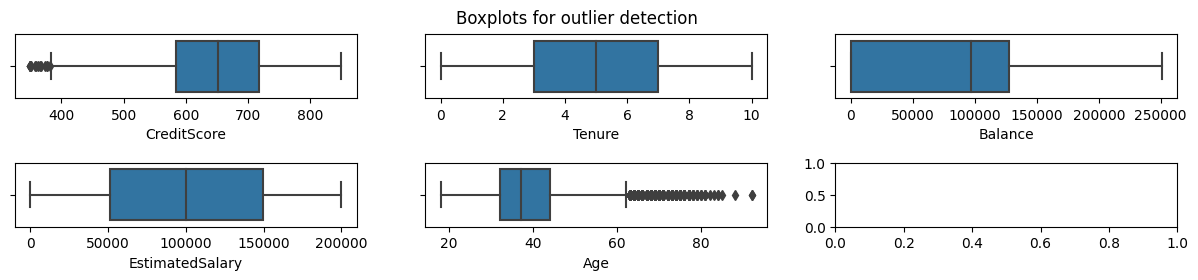

In [12]:
# create 2 row x 3 column figure
fig, axes = plt.subplots(2, 3, figsize=(15, 2.5))
fig.suptitle('Boxplots for outlier detection')
sns.boxplot(ax=axes[0,0], x=df['CreditScore'])
sns.boxplot(ax=axes[0,1], x=df['Tenure'])
sns.boxplot(ax=axes[0,2], x=df['Balance'])

# add spacing between the rows
plt.subplots_adjust(hspace=1
                    # left=0.1,
                    # bottom=0.1, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4
                    ) 

sns.boxplot(ax=axes[1,0], x=df['EstimatedSalary'])
sns.boxplot(ax=axes[1,1], x=df['Age'])
plt.show();

- `CreditScore` has some outliers for scores under 400
-  Customers over `Age` 60 are outliers. 

# EDA

**Target Variable = `Exited`**

**Class Imbalance**

In [13]:
# Get percentage of distinct values
df['Exited'].value_counts(normalize=True)*100

Exited
0    79.63
1    20.37
Name: proportion, dtype: float64

- Of 10,000 customers, at least 20% of the customers have Exited
- Since `Exited` feature is categorical, check class imbalance
- When predicting a categorical target, problems can arise when the class distribution is highly imbalanced. 
- `Exited` is split ~80-20 which is imbalance but is still fine.

## Feature Engineering

### CreditScore

mean 651


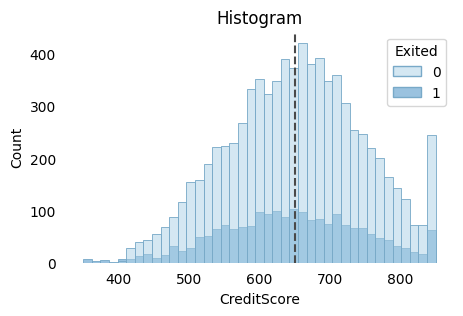

In [91]:
# Assign variable to x
x = 'CreditScore'

# Plot Histogram
fig = plt.figure(figsize=(5,3))
ax = sns.histplot(x=df[x], hue=df['Exited'], palette='Blues', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

#Calculate and display mean 
mean = df[x].mean()
print('mean',f'{mean:.0f}')
plt.axvline(mean, color='#494949', linestyle='--')
None

- CreditScore has a relatively normal distribution, with mean around a score of 651. 
- A little more than 300 customers achieved perfect Credit Score 


According to FICO, Credit Score rating as categorized as follows
- Very poor: 300 to 579
- Fair: 580 to 669
- Good: 670 to 739
- Very good: 740 to 799
- Excellent: 800 to 850

### CreditRating

**Feature Engineering:**

Create a new variable `CreditRating` to assign each CreditScore to a rating

In [15]:
# Create a new 'CreditRating' variable and assign based FICO ranges

df['CreditRating'] = np.select(
    [df['CreditScore'] <=579,
     df['CreditScore'].between(580, 669),
     df['CreditScore'].between(670, 739),
     df['CreditScore'].between(740, 799),
     df['CreditScore'].between(800, 859)],
    ['Very Poor', 'Fair', 'Good', 'Very Good','Excellent']
    )

df.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating
0,619,France,42,2,0.00,1,1,1,101348.88,1,Fair
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,Fair
2,502,France,42,8,159660.80,3,1,0,113931.57,1,Very Poor
3,699,France,39,1,0.00,2,0,0,93826.63,0,Good
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,Excellent


**Plot CreditRating vs Exited**

Let's see the churn rate for each Credit Rating

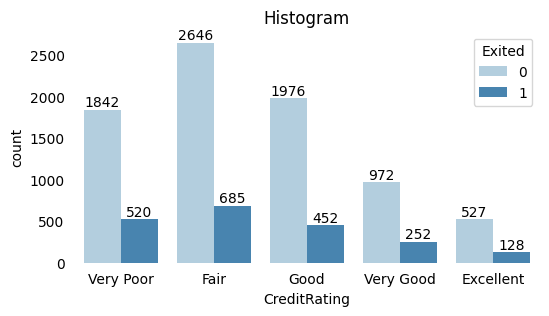

In [108]:
# Histogram
x = 'CreditRating'
fig = plt.figure(figsize=(6,3))
ax = sns.countplot(x=df[x], order=['Very Poor', 'Fair', 'Good', 'Very Good','Excellent'], hue=df['Exited'],palette="Blues")
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')


# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')
None

- Customers with 'Fair' credit rating has the highest churn count at 685, followed by 520 with 'Very Poor' and 452 with 'Good' credit rating, respectively. 

Let's calculate the churn rate for each rating based on the total count.

In [17]:
# Calculate churn rate
ratings = df['CreditRating'].unique().tolist()

for rating in ratings:
    count = df[(df['CreditRating'] == rating)].shape[0]
    Exited_count = df[(df['CreditRating'] == rating) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {rating} {percent_Exited:.1f}%')


Percent Exited in Fair 20.6%
Percent Exited in Very Poor 22.0%
Percent Exited in Good 18.6%
Percent Exited in Excellent 19.5%
Percent Exited in Very Good 20.6%


- The highest churn rate occurs when the customer has a 'Very Poor' credit rating. 
- Whereas the churn rate for 'Fair' ranked 2nd at 20.6% although it had the highest count of Exited customers. 
- In general, all credit ratings experience similar churn rates averaging around ~20%. 
- Are they dependencies between very poor credit card and whether the customer has a credit card or not?

### Credit Score vs. HasCrCard

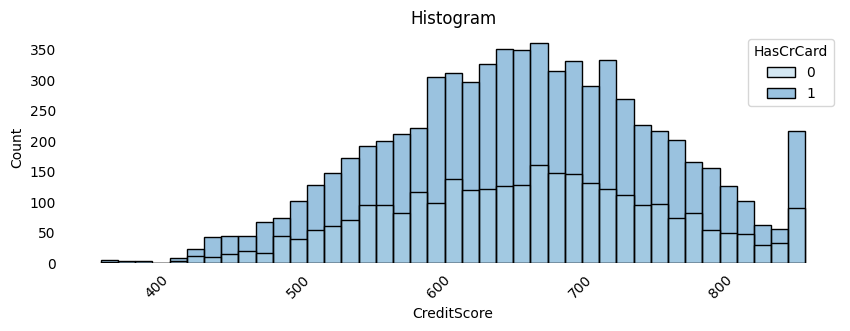

In [114]:
# Plot Histogram
fig = plt.figure(figsize=(10,3))
ax = sns.histplot(x=df['CreditScore'], hue=df['HasCrCard'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

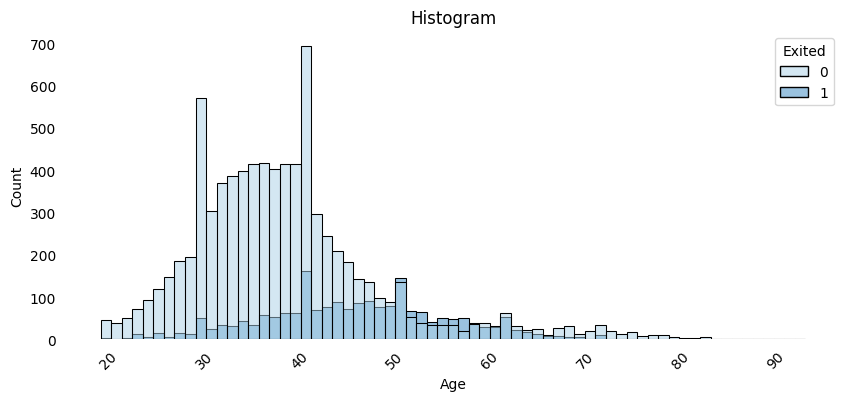

In [ ]:
# Plot Histogram
fig = plt.figure(figsize=(10,4))
ax = sns.histplot(x=df['Age'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

- The customers' credit score has a normal distribution regardless if the customer has a credit card or not. However, there are more customers with a credit card. 
- Therefore, having a credit card or not does not affect a customer's credit score.

### Age

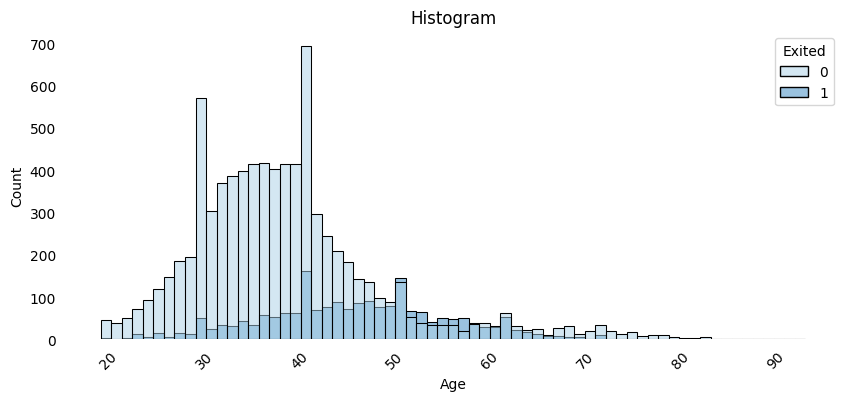

In [93]:
# Plot Histogram
fig = plt.figure(figsize=(10,4))
ax = sns.histplot(x=df['Age'], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

**Replot by grouping age in bins**

Text(0.5, 1.0, 'Age Bin Histogram')

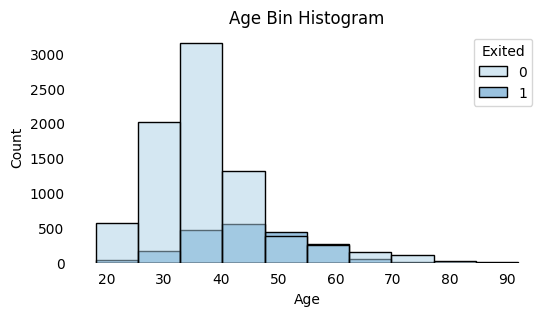

In [126]:
# Plot Histogram
fig = plt.figure(figsize=(6,3))
ax = sns.histplot(x=df['Age'], hue=df['Exited'], palette='Blues', bins=10)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Age Bin Histogram')

- Customers' age follow a right skewed distribution with majority between 30-40 years old. 
- Highest churn count peaks around 40-50 age group 

Let's look at Balance by Age 

In [161]:
# create interval range 
interval_range = pd.interval_range(start=10, freq=10, end=100)

#create a new column applying the bins
df['AgeBins'] = pd.cut(df['Age'], bins=interval_range, labels=[1,2,3])

#show original and new column with bins
df[['Age','AgeBins']]

,Age,AgeBins
0,42,"(40, 50]"
1,41,"(40, 50]"
2,42,"(40, 50]"
3,39,"(30, 40]"
4,43,"(40, 50]"
...,...,...
9995,39,"(30, 40]"
9996,35,"(30, 40]"
9997,36,"(30, 40]"
9998,42,"(40, 50]"


### Age Vs Balance

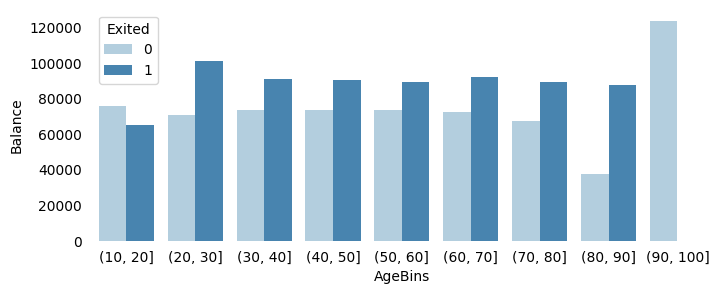

In [172]:
fig = plt.figure(figsize=(8,3))
ax = sns.barplot(x=df['AgeBins'], y=df['Balance'], estimator='mean', hue=df['Exited'], palette='Blues',errorbar=None)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
None

- The balance has a uniform distribution across the age groups
- For the majority of the age groups, customers with Balances over $80K have Exited.
    - Are there less interests/perks after reaching accumulating $80K?
    - Can look at increasing perks once customers reach $80K balance to retent customers. 

### Age vs CreditScore

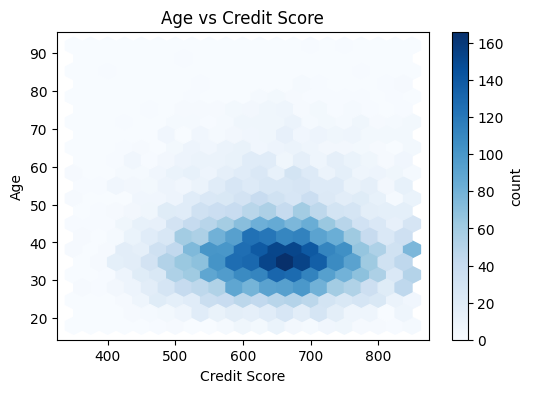

In [22]:
# plot hexbin
fig = plt.figure(figsize=(6,4))
plt.hexbin(x=df['CreditScore'], y=df['Age'], gridsize=20, cmap='Blues')
cb = plt.colorbar(label='count')
ax.tick_params(left=False, bottom=False) # Remove ticks

# Set the x-axis label.
plt.xlabel("Credit Score")

# Set the y-axis label.
plt.ylabel("Age")

# Set the title.
plt.title("Age vs Credit Score")
None


- majority of 30-40 years old customers have Credit Score of 650

### Age vs EstimatedSalary

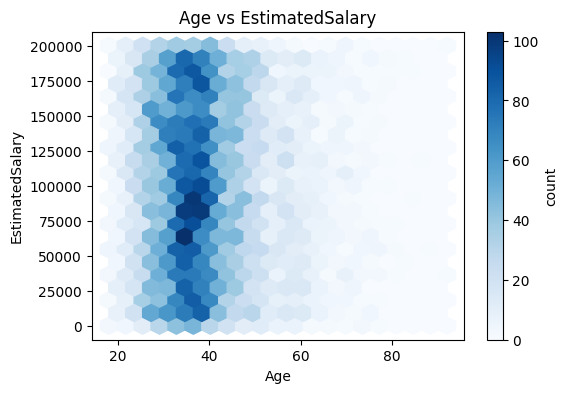

In [23]:
# plot hexbin
fig = plt.figure(figsize=(6,4))
plt.hexbin(x=df['Age'], y=df['EstimatedSalary'], gridsize=20, cmap='Blues')
cb = plt.colorbar(label='count')
ax.tick_params(left=False, bottom=False) # Remove ticks

# Set the x-axis label.
plt.xlabel("Age")

# Set the y-axis label.
plt.ylabel("EstimatedSalary")

# Set the title.
plt.title("Age vs EstimatedSalary")
None


## Geography

In [24]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

- Customers are from 3 countries: France, Germany, and Spain. 
- Over half are customers from France and the rest are split almost evenly between Germany and Spain

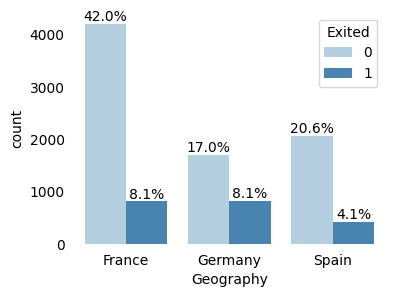

In [25]:
# Plot histogram
fig = plt.figure(figsize=(4,3))
ax = sns.countplot(x=df['Geography'], order=df['Geography'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

In [26]:
# Calculate churn rate for each country
countries = df['Geography'].unique().tolist()

for country in countries:
    count = df[(df['Geography'] == country)].shape[0]
    Exited_count = df[(df['Geography'] == country) & (df['Exited'] == 1)].shape[0]
    percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {country} {percent_Exited:.1f}%')


Percent Exited in France 16.2%
Percent Exited in Spain 16.7%
Percent Exited in Germany 32.4%


- Germany has the highest churn percentage at ~32%
- Whereas France and Spain are similar around ~16%

Based on this calculation, improvement efforts should be carried out in Germany to increase retention rate. 

- But let's check average customer balance for each country to gain additional insight

## Balance vs Geography vs Exited

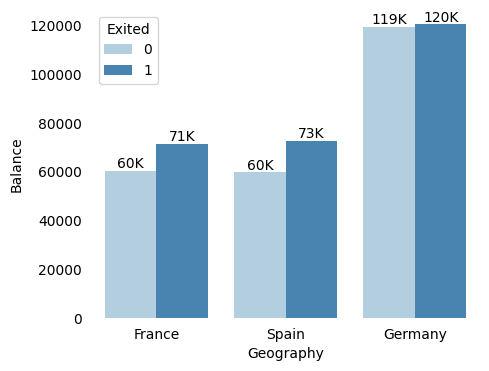

In [27]:
fig = plt.figure(figsize=(5,4))
ax = sns.barplot(x=df['Geography'], y=df['Balance'], hue=df['Exited'], palette='Blues', errorbar=None)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f'{height/1000:.0f}K'

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- In Germany, balance amount for Exited customers reached 120K, which is 50% of the total balance in Germany!
- Despite having the most customers, France's balance is just half of Germany's
- This validates the significance of prioritizing improvements in Germany

## Balance

mean 76486


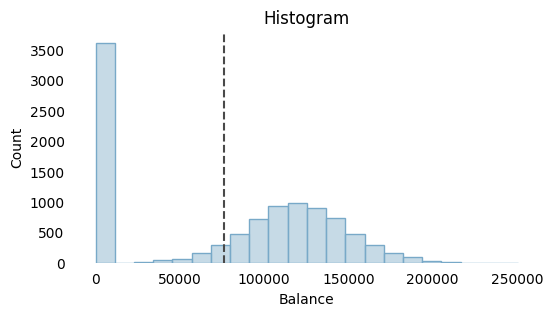

In [175]:
# Plot Histogram
fig = plt.figure(figsize=(6,3))
ax = sns.histplot(x=df['Balance'], color='#b3cede', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')

#Calculate and display mean 
mean = df['Balance'].mean()
print('mean',f'{mean:.0f}')
plt.axvline(mean, color='#494949', linestyle='--')
None

- Over 3500 customers or 35% of the customers have 0 balance. 
- If these customers are excluded, the balance data would follow a normal distribution
- What would cause customers to have bank account with no balance? Are they transferring money out of their account in preparation to exit? 
- Let's take a deeper dive into customers with 0 balance.

**Filter customers with zero Balance**

In [29]:
# Create a Boolean mask 
mask = (df['Balance'] == 0)   
df_mask = df[mask]
df_mask.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
3,699,France,39,1,0.0,2,0,0,93826.63,0,Good,"(30, 40]"
6,822,France,50,7,0.0,2,1,1,10062.80,0,Excellent,"(40, 50]"
11,497,Spain,24,3,0.0,2,1,0,76390.01,0,Very Poor,"(20, 30]"
12,476,France,34,10,0.0,2,1,0,26260.98,0,Very Poor,"(30, 40]"


**Plot**

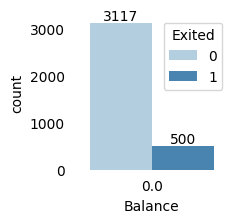

In [30]:
fig = plt.figure(figsize=(2,2))
ax = sns.countplot(x=df_mask['Balance'], hue=df_mask['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- 500 customers with no balance have Exited. 
- Considering around a total of 2000 customers have Exited, this is a significant amount as it's ~25% of the total customers that has Exited 
- Let's look at other variables to determine if they have any cause/effect relationship with customers who have no balance in their account


**Create another mask for customers with 0 balance and have Exited**

In [31]:
# Create a Boolean mask 
mask = (df['Balance'] == 0) &  (df['Exited'] == 1)
df_mask_churn = df[mask]
df_mask_churn.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.0,1,1,1,101348.88,1,Fair,"(40, 50]"
22,510,Spain,38,4,0.0,1,1,0,118913.53,1,Very Poor,"(30, 40]"
30,591,Spain,39,3,0.0,3,1,0,140469.38,1,Fair,"(30, 40]"
58,511,Spain,66,4,0.0,1,1,0,1643.11,1,Very Poor,"(60, 70]"
81,777,France,32,2,0.0,1,1,0,136458.19,1,Very Good,"(30, 40]"


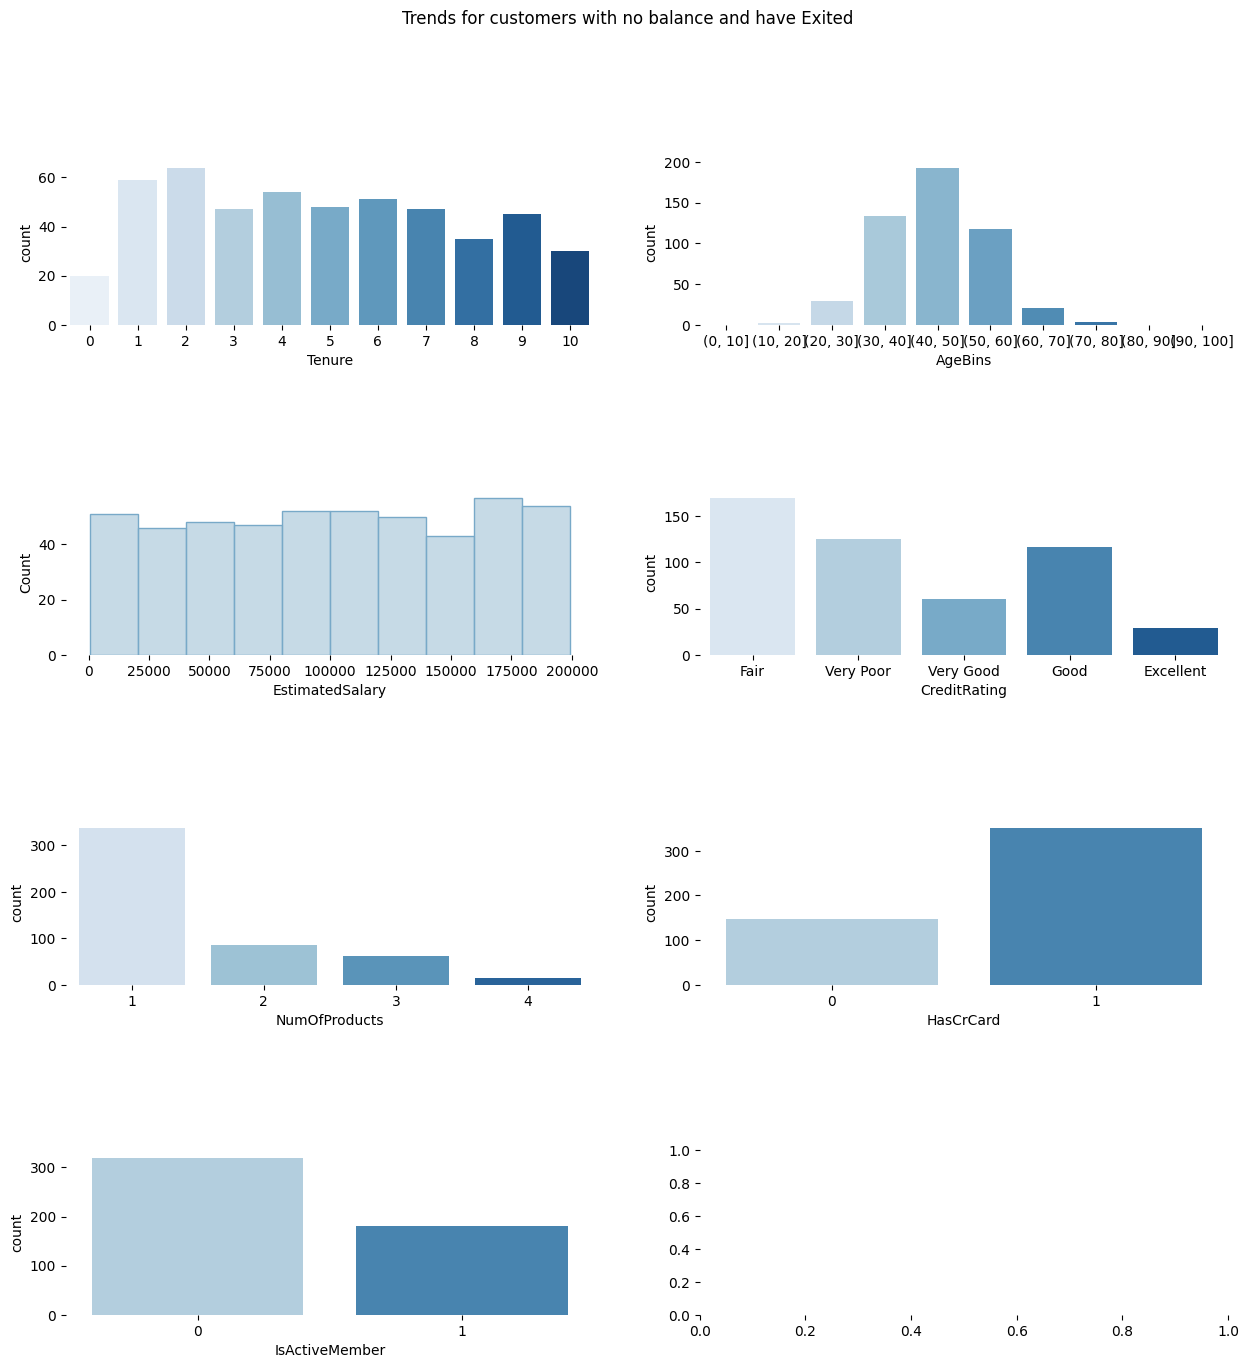

In [32]:
# create 4 row x 2 column figure
fig, axes = plt.subplots(4, 2, figsize=(15, 15))
fig.suptitle('Trends for customers with no balance and have Exited')
sns.countplot(ax=axes[0,0], x=df_mask_churn['Tenure'], palette='Blues')
sns.countplot(ax=axes[0,1], x=df_mask_churn['AgeBins'], palette='Blues')
sns.histplot(ax=axes[1,0], x=df_mask_churn['EstimatedSalary'], color='#b3cede', edgecolor='#78a9c8')
sns.countplot(ax=axes[1,1], x=df_mask_churn['CreditRating'], palette='Blues')
sns.countplot(ax=axes[2,0], x=df_mask_churn['NumOfProducts'], palette='Blues')
sns.countplot(ax=axes[2,1], x=df_mask_churn['HasCrCard'], palette='Blues')
sns.countplot(ax=axes[3,0], x=df_mask_churn['IsActiveMember'], palette='Blues')


# Remove ticks
ax.tick_params(left=False, bottom=False) 

# Remove borders borders
sns.despine(left=True, bottom=True) 

# add spacing between the rows
plt.subplots_adjust(hspace=1
                    # left=0.1,
                    # bottom=0.1, 
                    # right=0.9, 
                    # top=0.9, 
                    # wspace=0.4
                    ) 

plt.show();

Some noticeable observations for customer with no balance in their account....
- ~200 are around 30-40 years old
- ~300 have 1 product
- 300+ have a credit card
- 300+ are not an active number

For now, having a credit card and inactivity has the strongest link to customers with 0 balance. Let's look at those two variables

## HasCrCard

In [33]:
# Separate numerical and categorical variables into different df
df['HasCrCard'].value_counts()

HasCrCard
1    7055
0    2945
Name: count, dtype: int64

70% of the customers have a credit card

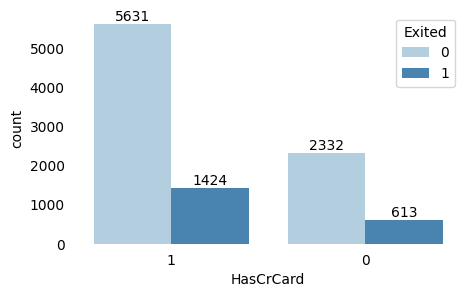

In [81]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['HasCrCard'], order=df['HasCrCard'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height:.0f}"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

In [89]:
# Calculate churn rate
card = df['HasCrCard'].unique().tolist()

for card in cards:
    count = df[(df['HasCrCard'] == card)].shape[0]
    Exited_count = df[(df['HasCrCard'] == card) & (df['Exited'] == 1)].shape[0]
    Percent_Exited = (Exited_count/count) * 100
    print(f'Percent Exited in {cards} {Percent_Exited:.1f}%')


Percent Exited in [1, 0] 20.2%
Percent Exited in [1, 0] 20.8%


- The number of customers who has a credit card and left are more then 2x those without cards. 
- However, when considering the total customer count for each group (with and without cards), the churn rates are similiar around 20%. It's just 0.6% less for those with a credit card. 

## IsActiveMember


In [35]:
# Separate numerical and categorical variables into different df
df['IsActiveMember'].value_counts()

IsActiveMember
1    5151
0    4849
Name: count, dtype: int64

About half of the customers are active and half are inactive

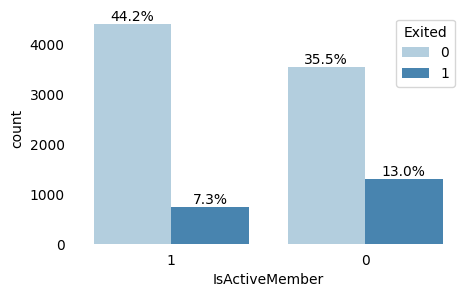

In [36]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['IsActiveMember'], order=df['IsActiveMember'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- Active members are less likely to churn compared to Non active customers. 

## NumOfProducts

In [37]:
# Separate numerical and categorical variables into different df
df['NumOfProducts'].value_counts()


NumOfProducts
1    5084
2    4590
3     266
4      60
Name: count, dtype: int64

There are up to 4 number of products a customer can hold. The majority of customers have only 1-2 products and very few has 3-4 products.

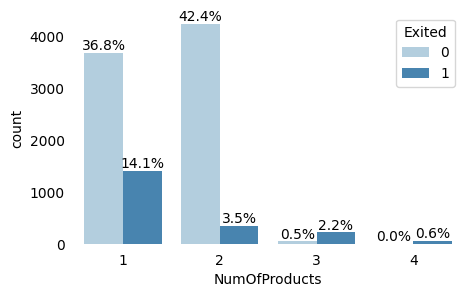

In [38]:
fig = plt.figure(figsize=(5,3))
ax = sns.countplot(x=df['NumOfProducts'], order=df['NumOfProducts'].value_counts(ascending=False).index, hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    percentage = (height / len(df)) * 100
    label = f"{percentage:.1f}%"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')

- Customers with 1 product has highest churn count. 
- Customers with 2 products has the lower churn rate.
- Customers and 3+ products are more likely to churn. 
- All customers wiht 4 products have churned 
- Suggestions
    - Promote deals/perks for customers with 1 product to sign up for a 2nd.
    - Investigate factors that causes customers to churn after getting 3-4 products
        - Is it difficult to manage? Can phone apps be altered to improve customer experience?
        - Is it affecting their account balance?


## NumOfProducts vs. Balance

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


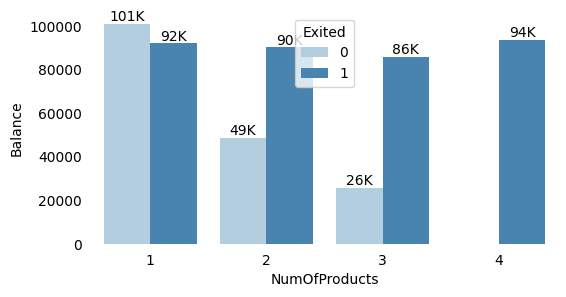

In [202]:
fig = plt.figure(figsize=(6,3))
ax = sns.barplot(x=df['NumOfProducts'], y=df['Balance'], hue=df['Exited'], palette='Blues', errorbar=None)
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# Loop through bars and add percentage labels
for patch in ax.patches:
    height = patch.get_height()
    label = f"{height/1000:.0f}K"  # Format as percentage with one decimal

    # Place the label at the top center of the bar
    x = patch.get_x() + patch.get_width() / 2 
    y = patch.get_height() + 0.1  # Adjust y position for better placement

    ax.text(x, y, label, ha='center', va='bottom')



## Estimated Salary

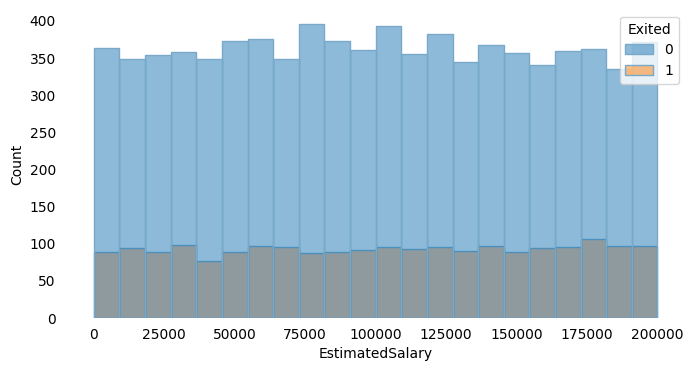

In [39]:
fig = plt.figure(figsize=(8,4))
ax = sns.histplot(x=df['EstimatedSalary'], hue=df['Exited'],color='#b3cede', edgecolor='#78a9c8')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders

# # Loop through bars and add percentage labels
# for patch in ax.patches:
#     height = patch.get_height()
#     label = f"{height:.0f}"  # Format as percentage with one decimal

#     # Place the label at the top center of the bar
#     x = patch.get_x() + patch.get_width() / 2 
#     y = patch.get_height() + 0.1  # Adjust y position for better placement

#     ax.text(x, y, label, ha='center', va='bottom')

- There's a uniform distribution of salary across all customers.
- This is true for Exited customers as well. 
- Estimated Salary doesnt seem to affect churn rate

## Tenure

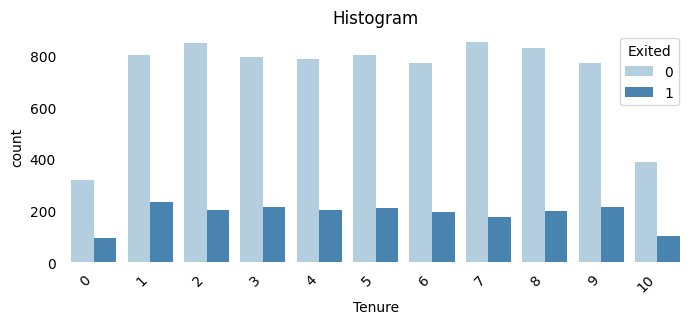

In [40]:
# Assign variable to x
x = 'Tenure'

# Plot Histogram
fig = plt.figure(figsize=(8,3))
ax = sns.countplot(x=df[x], hue=df['Exited'], palette='Blues')
ax.tick_params(left=False, bottom=False) # Remove ticks
sns.despine(left=True, bottom=True) # Remove borders borders
plt.title('Histogram')
plt.xticks(rotation=45, ha='right')
None

- There's a uniform distribution for tenure. 
- The churn amount hovers around 200 people for almost tenure periods. 
- In summary, the churn rate doesnt seem to be affected by tenure. 

## EDA Summary

**Variables with minimal impact on churn rate**
- Churn rate is uniform across tenure period, credit ratings and Estimated Salary, which means this variables have little influence on churn rate.

**Variables with potential impact on churn rate**
-  Age 
    - Highest churn count is between 40-50 age group 
    - For the majority of the age groups, customers with Balances over $80K have Exited.
    - Are there less interests/perks after reaching accumulating $80K?
- Geography 
    - Germany has the highest churn percentage at ~32%, whereas France and Spain are similar around ~16%
    - In Germany, balance amount for Exited customers reached 120K, which is 50% of the total balance in Germany!
    - Despite having the most customers, France's balance is just half of Germany's
- Credit Card
    - Customers with a credit card is 2x more likely to churn then those who doesnt. 
- Active Members
    - Active members are less likely to churn compared to Non active customers. 
- Num Of Products
    - Customers with 1 product has highest churn count. 
- Balance 
    - Over 3500 customers or 35% of the customers have 0 balance.
    - 500 customers with no balance have Exited. 
    - Considering around a total of 2000 customers have Exited, this is a significant amount as it's ~25% of the total customers that has Exited 
    - Having a credit card and inactivity has the strongest link to customers with 0 balance. Let's look at those two variables

**Recommendations for Customer Retention**
- This validates the significance of prioritizing improvements in Germany
- Can look at increasing perks once customers reach $80K balance to retent customers.
- Could there be unsatisfactory customer service/terms for the credit card users?
- One suggestion could be to promote deals/perks if customers sign up for another product as they are less likely to churn if they have at least 2 products with the bank. 



### Correlation between Variables

First, encode categorical variables 
- Use One Hot Encoding method since Geography is nonordinal 

In [41]:
# create a copy of df and assign new name
df_code = df.copy()
df_code.head()


,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins
0,619,France,42,2,0.00,1,1,1,101348.88,1,Fair,"(40, 50]"
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,Fair,"(40, 50]"
2,502,France,42,8,159660.80,3,1,0,113931.57,1,Very Poor,"(40, 50]"
3,699,France,39,1,0.00,2,0,0,93826.63,0,Good,"(30, 40]"
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,Excellent,"(40, 50]"


**Geography**

In [42]:
#c ange variable type
df_code['Geography'] = df['Geography'].astype("category")

# Create new column representing numerical value of Categorical Column 
df_code['GeographyCode'] = df_code['Geography'].cat.codes

# show df
df_code[['Geography','GeographyCode']].head(10)


,Geography,GeographyCode
0,France,0
1,Spain,2
2,France,0
3,France,0
4,Spain,2
5,Spain,2
6,France,0
7,Germany,1
8,France,0
9,France,0


**CreditRating**

In [43]:
# Create new column representing numerical value for Ordinal (discrete but ranked) Column 'X'
df_code['CreditRating'] = df_code['CreditRating'].map({'Very Poor': 1,
                                                        'Fair': 2,
                                                        'Good': 3,
                                                        'Very Good': 4,
                                                        'Excellent':5}
                                                        )
# show df
df_code['CreditRating'].head()

0    2
1    2
2    1
3    3
4    5
Name: CreditRating, dtype: int64

# Feature Selection

In [44]:
df_code.head()

,CreditScore,Geography,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CreditRating,AgeBins,GeographyCode
0,619,France,42,2,0.00,1,1,1,101348.88,1,2,"(40, 50]",0
1,608,Spain,41,1,83807.86,1,0,1,112542.58,0,2,"(40, 50]",2
2,502,France,42,8,159660.80,3,1,0,113931.57,1,1,"(40, 50]",0
3,699,France,39,1,0.00,2,0,0,93826.63,0,3,"(30, 40]",0
4,850,Spain,43,2,125510.82,1,1,1,79084.10,0,5,"(40, 50]",2


### Correlation Matrix

**Drop redundant columns**

In [45]:
df_code = df_code.drop(['Geography','AgeBins','CreditScore','EstimatedSalary','Tenure'],axis=1)

**Heatmap**

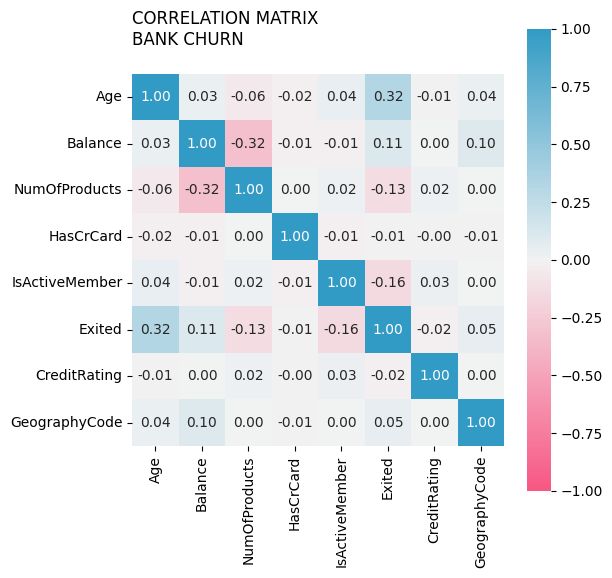

In [46]:
# Create heatmap to check correlation between variables
plt.figure(figsize=(6, 6))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)


# If not dropping any variables use df.corr()
sns.heatmap(df_code.corr(method='spearman'), 
            square=True, 
            fmt=".2f", 
            annot=True, 
            vmin = -1, 
            vmax = 1, 
            cmap=cmap)

ax.set_ylim([0,2])
ax.set_xlim([0,2])
# plt.xticks([-6.5,1.5],labels=[1,0])
# plt.yticks([-6.5,1.5],labels=[1,0])

# title
title = 'CORRELATION MATRIX\nBANK CHURN\n'
plt.title(title, loc='left', fontsize=12)

# Display plot
plt.show()

Positive Correlations
- 0.32: Exited & Age
- 0.11: Exited & Balance
- 0.05: Exited & GeographyCode
- 0.10: Geography & Balance

Negative Correlations
- -0.32: NumofProducts & Balance
- -0.16: Exited & IsActiveMember
- -0.13: Exited & NumOfProducts

 



**Feature Selection**
- Target: Exited
- Predictive: Age, IsActiveMember, Balance, Geography, NumOfProducts
- Irrelevant: CreditRating, HasCrCard


**Drop Irrelevant Feature for model**

In [47]:
df_model = df_code.drop(['CreditRating','HasCrCard',],axis=1)
df_model.head()

,Age,Balance,NumOfProducts,IsActiveMember,Exited,GeographyCode
0,42,0.00,1,1,1,0
1,41,83807.86,1,1,0,2
2,42,159660.80,3,0,1,0
3,39,0.00,2,0,0,0
4,43,125510.82,1,1,0,2


# Naive Bayes Model

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB 

import sklearn.metrics as metrics
from sklearn.metrics import recall_score, precision_score, f1_score, accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

### Split the Data

Notice below that we include the argument **stratify=y**. If our master data has a class split of 80/20, stratifying ensures that this proportion is maintained in both the training and test data. =y tells the function that it should use the class ratio found in the y variable (our target).

In [49]:
# Define the y (target) variable
y = df_model['Exited']

# Define the X (predictor) variables
X = df_model.copy()
X = X.drop('Exited', axis=1)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)

**Print the shape of each output**

In [50]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print(X_train.shape)

# Print the shape of X_test.
print(X_test.shape)

# Print the shape of y_train.
print(y_train.shape)

# Print the shape of y_test.
print(y_test.shape)

(7500, 5)
(2500, 5)
(7500,)
(2500,)


What's the training percent vs test percent?
- 25% Training
- 75% Testing

- Rows of X/Y Train: 2500
- Rows of X/Y Test:7500
- Col of X Train & Test: 6
- Col of Y Train & Test: 



### Build Model
begin with fitting our model to the training data, and then using the model to make predictions on the test data.

In [51]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
gnb = GaussianNB()

# Fit the model on your training data.
gnb.fit(X_train, y_train)

# Apply your model to predict on your test data. 
y_preds = gnb.predict(X_test)

### Evalute 

In [52]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds))
print('Precision:', '%.3f' % precision_score(y_test,y_preds))
print('Recall:', '%.3f' % recall_score(y_test, y_preds))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds))

Accuracy: 0.788
Precision: 0.364
Recall: 0.055
F1 Score: 0.096


False Negative: Predicting a customer would stay but they actually left.  
False Positive: Predicting a customer would leave but they stayed

Cost of **False Negative** is **higher** than cost of False Positive in this case.

Therefore `Recall` is the best metric to assess this model
- This model only has a 5.7% recall score which makes it a poor prediction model. 

### Confusion Matrix

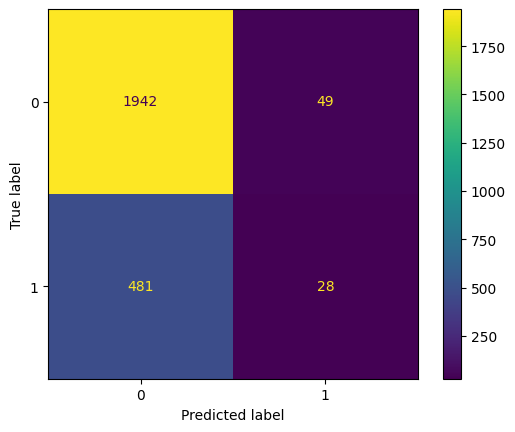

In [53]:
# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_preds)

# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

# Plot the visual in-line.
disp.plot()

What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?

- TN = 1944
- TP = 29
- FN = 480
- FP = 47

### Rerun model with Scale Data

- Since *Balance* values are larger compared to other features, standardization helps it from having undue influence over a model compared to features with smaller values

In [54]:
#from sklearn module we are importing standard scalar
from sklearn.preprocessing import StandardScaler

#creating a standard scalar object as scalar
scaler=StandardScaler()

#fit the data into scaler it will learn parameters
scaler.fit(X_train)

#transform train and test split into requirement for standardization
X_train_scaled=scaler.transform(X_train)
X_test_scaled=scaler.transform(X_test)


In [55]:
# Print the shape (rows, columns) of the output from the train-test split.

# Print the shape of X_train.
print(X_train_scaled.shape)

# Print the shape of X_test.
print(X_test_scaled.shape)

# Print the shape of y_train.
print(y_train.shape)

# Print the shape of y_test.
print(y_test.shape)

(7500, 5)
(2500, 5)
(7500,)
(2500,)


### Build Model
begin with fitting our model to the training data, and then using the model to make predictions on the test data.

In [56]:
# Assign `nb` to be the appropriate implementation of Naive Bayes.
gnb = GaussianNB()

# Fit the model on your training data.
gnb.fit(X_train_scaled, y_train)

# Apply your model to predict on your test data. 
y_preds_scaled = gnb.predict(X_test_scaled)

### Evalute 

In [57]:
print('Accuracy:', '%.3f' % accuracy_score(y_test, y_preds_scaled))
print('Precision:', '%.3f' % precision_score(y_test,y_preds_scaled))
print('Recall:', '%.3f' % recall_score(y_test, y_preds_scaled))
print('F1 Score:', '%.3f' % f1_score(y_test, y_preds_scaled))

Accuracy: 0.830
Precision: 0.822
Recall: 0.208
F1 Score: 0.332


After scaling data, `Recall` has increase to 23.8% but still not good for the prediction model. 

### Confusion Matrix

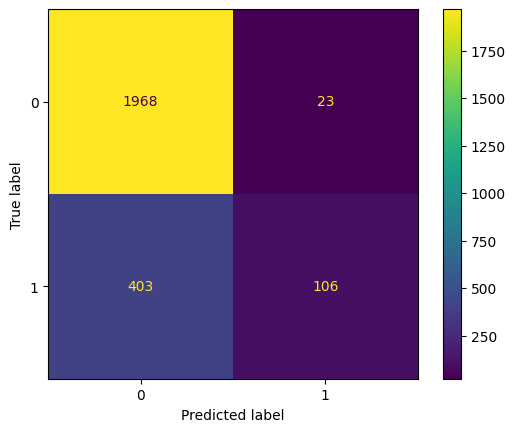

In [58]:
# Construct the confusion matrix for your predicted and test values.
cm = metrics.confusion_matrix(y_test, y_preds_scaled)

# Create the display for your confusion matrix.
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gnb.classes_)

# Plot the visual in-line.
disp.plot()

In [59]:
tn, fp, fn, tp = cm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  1968
False Positives:  23
False Negatives:  403
True Positives:  106


What do you notice when observing your confusion matrix, and does this correlate to any of your other calculations?

- TN = 1960
- TP = 121
- FN = 388
- FP = 31

# Bionomial Logistic Regression Model

In [60]:
# Load in sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve


### Assumptions

- Sufficiently large sample size
- Outcome variable is categorical
1. `Independent Observations`: Each observation in the dataset is independent.
2. `No multicollinearity`: No two independent variables (Xi and Xj) can be highly correlated with each other.
3. `No extreme outliers`
4. `Linearity`: Linear relationship between each X variable and the **logit of the outcome variable**.

### 1.Independent Observations

- each row represents a different customer hence, observations are independent

### 2.No Multicollinearity

**Correlation Matrix**

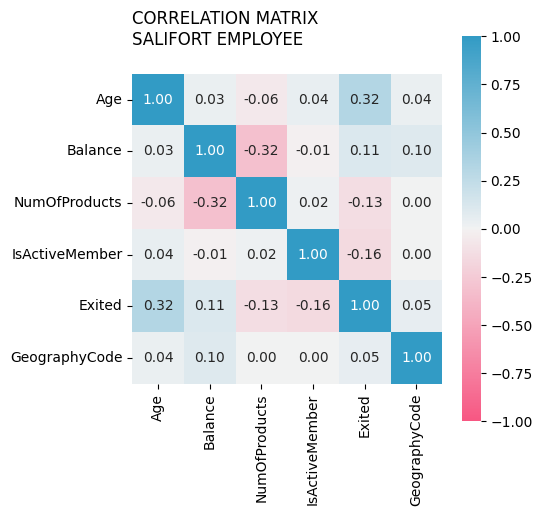

In [61]:
# Create heatmap to check correlation between variables
plt.figure(figsize=(5, 5))

# color map
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

# If not dropping any variables use df.corr()
sns.heatmap(df_model.corr(method='spearman'), 
            square=True, 
            fmt=".2f", 
            annot=True, 
            vmin = -1, 
            vmax = 1, 
            cmap=cmap)

# title
title = 'CORRELATION MATRIX\nSALIFORT EMPLOYEE\n'
plt.title(title, loc='left', fontsize=12)

# Display plot
plt.show()

 None of variables have correlation ~0.7 hence none are multicolinear 


### 3.No Outliers
Since logistic regression is quite sensitive to outliers, it would be a good idea at this stage to remove the outliers

In [62]:
# Select rows without outliers in `` and save resulting dataframe in a new variable
df_logreg = df[(df[''] >= lower_limit) & (df[''] <= upper_limit)]

# Display first few rows of new dataframe
df_logreg.head()

KeyError: ''

### Build LogReg Model (Classifier)

In [ ]:
# fit the model to the data by using the .fit() function
# save the fitted model as a variable called model
model = LogisticRegression(random_state=42,max_iter=500).fit(X_train,y_train)

Test the logistic regression model: use the model to make predictions on the test set.

In [ ]:
# Use the logistic regression model to get predictions on the test set
y_pred = model.predict(X_test)

**𝛽1 coefficient**
- For every **unit increase in X**, the log **odds of Y increase by (e^𝛽1)%** 

In [ ]:
# Print the coefficient 𝛽1
pd.Series(model.coef_[0], index=X.columns)

Age               0.068515
Balance           0.000005
NumOfProducts    -0.017455
IsActiveMember   -1.045037
GeographyCode     0.083505
dtype: float64

In [ ]:
# Print the intercept 𝛽0
model.intercept_

array([-4.13433872])

### 4.Linearity

Verify the linear relationship between X and the estimated log odds (known as logits) by making a regplot.

Call the model's `predict_proba()` method to generate the probability of response for each sample in the training data. (The training data is the argument to the method.) Assign the result to a variable called `training_probabilities`. This results in a 2-D array where each row represents a user in `X_train`. The first column is the probability of the user not churning, and the second column is the probability of the user churning.

In [ ]:
# Get the predicted probabilities of the training data
training_probabilities = model.predict_proba(X_train)
training_probabilities

array([[0.72492279, 0.27507721],
       [0.89494958, 0.10505042],
       [0.71722364, 0.28277636],
       ...,
       [0.91079161, 0.08920839],
       [0.75092517, 0.24907483],
       [0.822818  , 0.177182  ]])

In logistic regression, the relationship between a predictor variable and the dependent variable does not need to be linear, however, the log-odds (a.k.a., logit) of the dependent variable with respect to the predictor variable should be linear. Here is the formula for calculating log-odds, where _p_ is the probability of response:
<br>
$$
logit(p) = ln(\frac{p}{1-p})
$$
<br>

1. Create a dataframe called `logit_data` that is a copy of `df`.

2. Create a new column called `logit` in the `logit_data` dataframe. The data in this column should represent the logit for each user.


In [ ]:
# 1. Copy the `X_train` dataframe and assign to `logit_data`
logit_data = X_train.copy()

# 2. Create a new `logit` column in the `logit_data` df
logit_data['logit'] = [np.log(prob[1] / prob[0]) for prob in training_probabilities]

Plot a regplot where the x-axis represents an independent variable and the y-axis represents the log-odds of the predicted probabilities.

In an exhaustive analysis, this would be plotted for each continuous or discrete predictor variable.

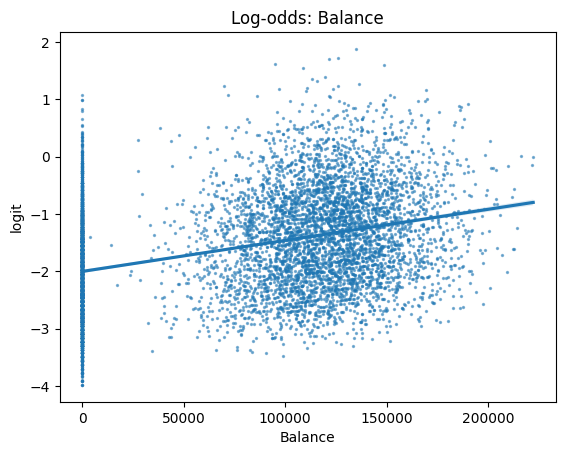

In [ ]:
# Plot the logistic regression and its confidence band
sns.regplot(x='Balance', y='logit', data=logit_data, scatter_kws={'s': 2, 'alpha': 0.5})
plt.title('Log-odds: Balance');

### Evaluate Classifer
Test the logistic regression model: use the model to make predictions on the test set.

In [ ]:
# Save predictions
# Use predict to output 0's and 1's.
y_pred = model.predict(X_test)

# Print out the predicted labels
print(y_pred)

[0 0 0 ... 0 0 0]


In [ ]:
# Print out the predicted probabilities
# Use predict_proba to output a probability.
model.predict_proba(X_test)[::,-1]

array([0.23442445, 0.09504366, 0.12073206, ..., 0.41256791, 0.19062373,
       0.26767813])

#### Confusion matrix
- A confusion matrix helps summarize the performance of a classifier. 
- A graphical representation of **how accurate a classifier is at predicting** the labels for a categorical variable

Defintions 
- **True negatives:** The count of observations that a classifier correctly predicted as False (0)
- **True positives:** The count of observations that a classifier correctly predicted as True (1)
-  **False positives:** The count of observations that a classifier incorrectly predicted as True (1)
- **False negatives:**  The count of observations that a classifier incorrectly predicted as False (0)
- perfect model would yield **all true** negatives and true positives, and **no false** negatives or false positives.



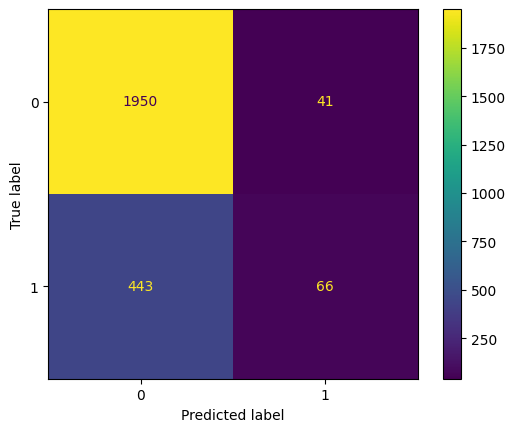

In [ ]:
# Calculate the values for each quadrant in the confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred, labels = model.classes_)

# Create the confusion matrix as a visualization
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm,display_labels = model.classes_)

# Display the confusion matrix
disp.plot()

##### Choose Metrics






##### Print Metrics

In [ ]:
print("Accuracy:", "%.3f" % metrics.accuracy_score(y_test, y_pred))
print("Precision:", "%.3f" % metrics.precision_score(y_test, y_pred))
print("Recall:", "%.3f" % metrics.recall_score(y_test, y_pred))
print("F1 Score:", "%.3f" % metrics.f1_score(y_test, y_pred))

Accuracy: 0.806
Precision: 0.617
Recall: 0.130
F1 Score: 0.214


Create a classification report

- read weighted averages

In [ ]:
# Create a classification report
target_labels = ['stayed', 'left']
print(classification_report(y_test, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

      stayed       0.81      0.98      0.89      1991
        left       0.62      0.13      0.21       509

    accuracy                           0.81      2500
   macro avg       0.72      0.55      0.55      2500
weighted avg       0.77      0.81      0.75      2500



### Feature Importance

Generate a bar graph of the model's coefficients for a visual representation of the importance of the model's features.

In [ ]:
# Create a list of (column_name, coefficient) tuples
feature_importance = list(zip(X_train.columns, model.coef_[0]))

# Sort the list by coefficient value
feature_importance = sorted(feature_importance, key=lambda x: x[1], reverse=True)
feature_importance

[('GeographyCode', 0.0835048581463275),
 ('Age', 0.06851496061136275),
 ('Balance', 4.957625955715546e-06),
 ('NumOfProducts', -0.017454957220847465),
 ('IsActiveMember', -1.045036596617191)]

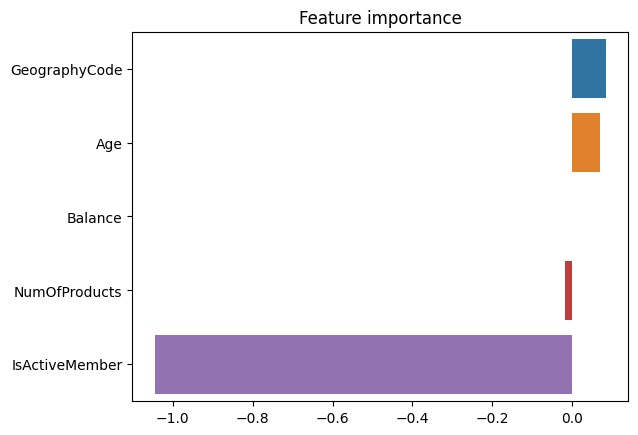

In [ ]:
# Plot the feature importances
import seaborn as sns
sns.barplot(x=[x[1] for x in feature_importance],
            y=[x[0] for x in feature_importance],
            orient='h')
plt.title('Feature importance');

### Results